In [1]:
!pip install librosa numpy matplotlib scikit-learn

python packages


In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Load sample audio

In [3]:
audio, sr = librosa.load(librosa.ex('trumpet'))

print("Sample Rate:", sr)
print("Audio Length:", len(audio))

Sample Rate: 22050
Audio Length: 117601


Visualize audio waveform

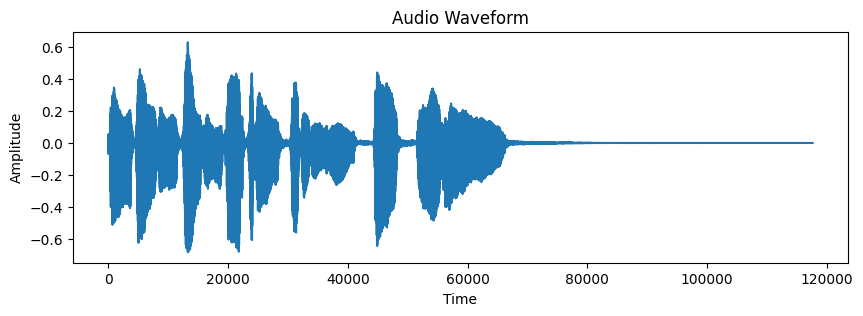

In [4]:
plt.figure(figsize=(10,3))
plt.plot(audio)
plt.title("Audio Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

Extract MFCC

In [5]:
mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

print("MFCC shape:", mfcc.shape)

MFCC shape: (13, 230)


Visualize MFCC

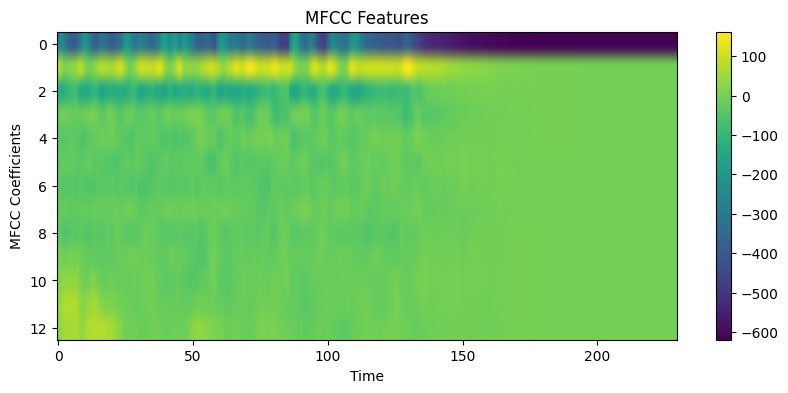

In [6]:
plt.figure(figsize=(10,4))
plt.imshow(mfcc, aspect='auto')
plt.colorbar()
plt.title("MFCC Features")
plt.xlabel("Time")
plt.ylabel("MFCC Coefficients")
plt.show()

Create Dummy Dataset

In [7]:
X = []
y = []

for i in range(20):
    X.append(np.mean(mfcc, axis=1))
    y.append(0)  # Normal

for i in range(20):
    X.append(np.mean(mfcc + np.random.randn(*mfcc.shape), axis=1))
    y.append(1)  # Faulty

X = np.array(X)
y = np.array(y)

print("Dataset shape:", X.shape)

Dataset shape: (40, 13)


Train ML Classifier

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


Prediction Output

In [ ]:
sample_input = X_test[0].reshape(1, -1)
prediction = model.predict(sample_input)

if prediction[0] == 0:
    print("Prediction: Normal Sound")
else:
    print("Prediction: Faulty Sound")

Prediction: Normal Sound


In [ ]:
print("""
Gemini Explanation (Simulated):
The detected sound pattern shows abnormal frequency components,
which may indicate mechanical wear or misalignment.
Recommended inspection is advised.
""")


Gemini Explanation (Simulated):
The detected sound pattern shows abnormal frequency components,
which may indicate mechanical wear or misalignment.
Recommended inspection is advised.

